This question I want to get from this dataset are:
- Total types of the real estate that exist in the dataset
- Total types of the real estate in specific location

In [134]:
import matplotlib.pyplot as plt
import numpy as np
from pandas import json_normalize
import pandas as pd
from pandas import json_normalize
import json
import re

In [135]:
def load_data(title):
    with open(title,encoding='utf-8') as f:
        return json.load(f)

In [136]:
realestate_kh = "./realestate_kh.json"
realestate_kh_list = load_data(realestate_kh)

In [137]:
df2 = json_normalize(realestate_kh_list) 
df2

,name,location,category,price,infos
0,None,None,None,None,[]
1,Villa for Sale in Siem Reap-Kon Deak Borey Tou...,Siem Reap,Villa,"$130,000","[<span class=""label"">Bedrooms: 3</span>, <span..."
2,Land for Sale in​ Krong Siem Reap-Sangkat Chreav,Siem Reap,Land,"$59,150","[<span class=""label"">Land area: 455m²</span>]"
3,Spacious 2Bedroom Condo For Sale in Olympia City,Phnom Penh,Condo,"$220,000","[<span class=""label"">Bedrooms: 2</span>, <span..."
4,DABEST PROPERTIES: Luxuxry Villa for Sale in S...,Siem Reap,Villa,"$550,000","[<span class=""label"">Bedrooms: 6</span>, <span..."
...,...,...,...,...,...
1045,None,Phnom Penh,Condo,"$120,000","[<span class=""label"">Bedrooms: 1</span>, <span..."
1046,None,Phnom Penh,Villa,"$285,000","[<span class=""label"">Bedrooms: 4</span>, <span..."
1047,None,Siem Reap,House,"$120,000","[<span class=""label"">Bedrooms: 3</span>, <span..."
1048,None,Phnom Penh,Condo,"$90,000","[<span class=""label"">Bedrooms: 1</span>, <span..."


## Exploring the data

### Get category data

In [138]:
realestate_type = []

# loop to get cate into one array 
# for cate in realestate_kh_list:
#     print(cate['category'])
# since have duplicates we want to remo|ve it.
# sources : https://stackoverflow.com/questions/9835762/how-do-i-find-the-duplicates-in-a-list-and-create-another-list-with-them
seen = set()
for realestate in realestate_kh_list:
    if realestate['category'] not in seen and realestate['category'] != None and realestate['category'] != re.search("POA", (realestate['category'])):
        realestate_type.append(realestate['category'])
        seen.add(realestate['category'])

realestate_type.remove('LandPOA  ')
realestate_type.remove('ApartmentPOA  ')
realestate_type.remove('Serviced Apartment')
realestate_type.remove('Residential Property')
realestate_type
         

['Villa',
 'Land',
 'Condo',
 'Apartment',
 'Project',
 'House',
 'Link House',
 'Borey',
 'Studio',
 'Flat',
 'Twin Villa',
 'Flat House',
 'Shophouse']

In [139]:
categoryArr = []
for item in realestate_kh_list:
    categoryArr.append(item['category'])


realestate_type_counts = {i:categoryArr.count(i) for i in categoryArr}

realestate_type_counts.pop(None)
realestate_type_counts.pop('ApartmentPOA  ')
realestate_type_counts.pop('LandPOA  ')
realestate_type_counts.pop('Serviced Apartment')
realestate_type_counts.pop('Residential Property')

realestate_type_counts

{'Villa': 122,
 'Land': 334,
 'Condo': 197,
 'Apartment': 69,
 'Project': 11,
 'House': 134,
 'Link House': 16,
 'Borey': 4,
 'Studio': 2,
 'Flat': 14,
 'Twin Villa': 47,
 'Flat House': 19,
 'Shophouse': 24}

## Total realestate_type compare from one to another

<BarContainer object of 13 artists>

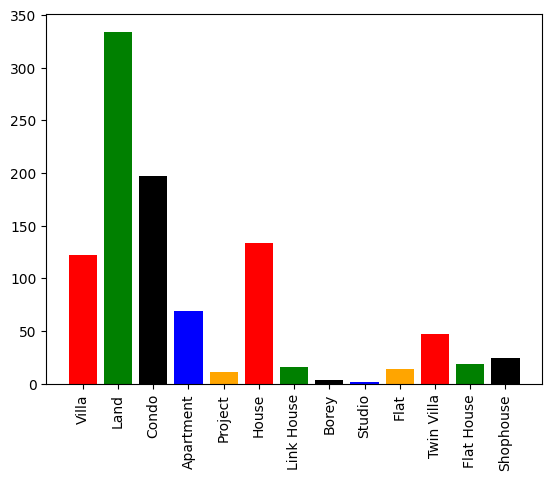

In [140]:
heights = list(realestate_type_counts.values())
bars = realestate_type
y_pos = range(len(bars))
c = ['red', 'green', 'black', 'blue', 'orange']

# Rotation of the bars names
plt.xticks(y_pos, bars,rotation=90)
plt.bar(y_pos, heights,color=c)


## Total realestate_type compare from one to another base in city or province

In [477]:
# function for finding realestate at all locatios
import collections
def count_realestate_and_location(location_name):
    realestate_location_type = {}
    list_realestate = []
    for item in realestate_kh_list:
        if item['location'] == location_name:
            list_realestate.append(item['category'])
    realestate_location_type = {i:list_realestate.count(i) for i in list_realestate}
    if None in realestate_location_type:
        realestate_location_type.pop(None)
    if 'ApartmentPOA  ' in realestate_location_type:
        realestate_location_type.pop('ApartmentPOA  ')
    if 'Residential Property' in realestate_location_type:
        realestate_location_type.pop('Residential Property')
    if 'LandPOA  ' in realestate_location_type:
        realestate_location_type.pop('LandPOA  ')
    if 'Serviced Apartment' in realestate_location_type:
        realestate_location_type.pop('Serviced Apartment')
    for realestate_type_check in realestate_type:

        if realestate_type_check in realestate_location_type.keys():
            pass
        else:
            realestate_location_type[realestate_type_check] =  0
    if realestate_location_type:
        result = dict(sorted(realestate_location_type.items()))
        print(result)
        return list(result.values())


        
count_realestate_and_location('Phnom Penh')
# realestate_type

{'Apartment': 57, 'Borey': 4, 'Condo': 172, 'Flat': 11, 'Flat House': 13, 'House': 26, 'Land': 57, 'Link House': 13, 'Project': 11, 'Shophouse': 17, 'Studio': 1, 'Twin Villa': 38, 'Villa': 82}


[57, 4, 172, 11, 13, 26, 57, 13, 11, 17, 1, 38, 82]

In [448]:
count_realestate_and_location('Kampong Cham')


{'Apartment': 0, 'Borey': 0, 'Condo': 0, 'Flat': 0, 'Flat House': 0, 'House': 0, 'Land': 2, 'Link House': 0, 'Project': 0, 'Shophouse': 0, 'Studio': 0, 'Twin Villa': 0, 'Villa': 0}


[0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0]

In [449]:
# get location to list

locationArr = ['Banteay Meanchey','Battambang','Kampong Cham','Kampong Chhnang','Kampong Speu','Kampong Thom','Kampot','Kandal','Koh Kong','Kratié','Mondulkiri','Phnom Penh','Preah Vihear','Prey Veng','Pursat','Ratanakiri','Siem Reap','Preah Sihanouk','Stung Treng','Svay Rieng','Takéo','Oddar Meanchey','Kep','Pailin','Tboung Khmum']
location_count_with_realestate_type = []
for location in locationArr:
    print("".join(str(count_realestate_and_location(location))))
    data = {"".join(str(count_realestate_and_location(location))), location}
    location_count_with_realestate_type.append(data)
location_count_with_realestate_type

{'Apartment': 0, 'Borey': 0, 'Condo': 0, 'Flat': 0, 'Flat House': 0, 'House': 0, 'Land': 0, 'Link House': 0, 'Project': 0, 'Shophouse': 0, 'Studio': 0, 'Twin Villa': 0, 'Villa': 0}
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
{'Apartment': 0, 'Borey': 0, 'Condo': 0, 'Flat': 0, 'Flat House': 0, 'House': 0, 'Land': 0, 'Link House': 0, 'Project': 0, 'Shophouse': 0, 'Studio': 0, 'Twin Villa': 0, 'Villa': 0}
{'Apartment': 0, 'Borey': 0, 'Condo': 0, 'Flat': 0, 'Flat House': 0, 'House': 0, 'Land': 0, 'Link House': 0, 'Project': 0, 'Shophouse': 0, 'Studio': 0, 'Twin Villa': 0, 'Villa': 0}
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
{'Apartment': 0, 'Borey': 0, 'Condo': 0, 'Flat': 0, 'Flat House': 0, 'House': 0, 'Land': 0, 'Link House': 0, 'Project': 0, 'Shophouse': 0, 'Studio': 0, 'Twin Villa': 0, 'Villa': 0}
{'Apartment': 0, 'Borey': 0, 'Condo': 0, 'Flat': 0, 'Flat House': 0, 'House': 0, 'Land': 2, 'Link House': 0, 'Project': 0, 'Shophouse': 0, 'Studio': 0, 'Twin Villa': 0, 'Villa': 0}
[0, 0, 0, 0, 0,

[{'Banteay Meanchey', '[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'},
 {'Battambang', '[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'},
 {'Kampong Cham', '[0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0]'},
 {'Kampong Chhnang', '[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'},
 {'Kampong Speu', '[0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0]'},
 {'Kampong Thom', '[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'},
 {'Kampot', '[0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0]'},
 {'Kandal', '[4, 0, 2, 1, 0, 1, 9, 2, 0, 3, 0, 1, 3]'},
 {'Koh Kong', '[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'},
 {'Kratié', '[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'},
 {'Mondulkiri', '[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'},
 {'Phnom Penh', '[57, 4, 172, 11, 13, 26, 57, 13, 11, 17, 1, 38, 82]'},
 {'Preah Vihear', '[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'},
 {'Prey Veng', '[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'},
 {'Pursat', '[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'},
 {'Ratanakiri', '[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'},
 {'Siem Reap', '[8, 0, 17, 2

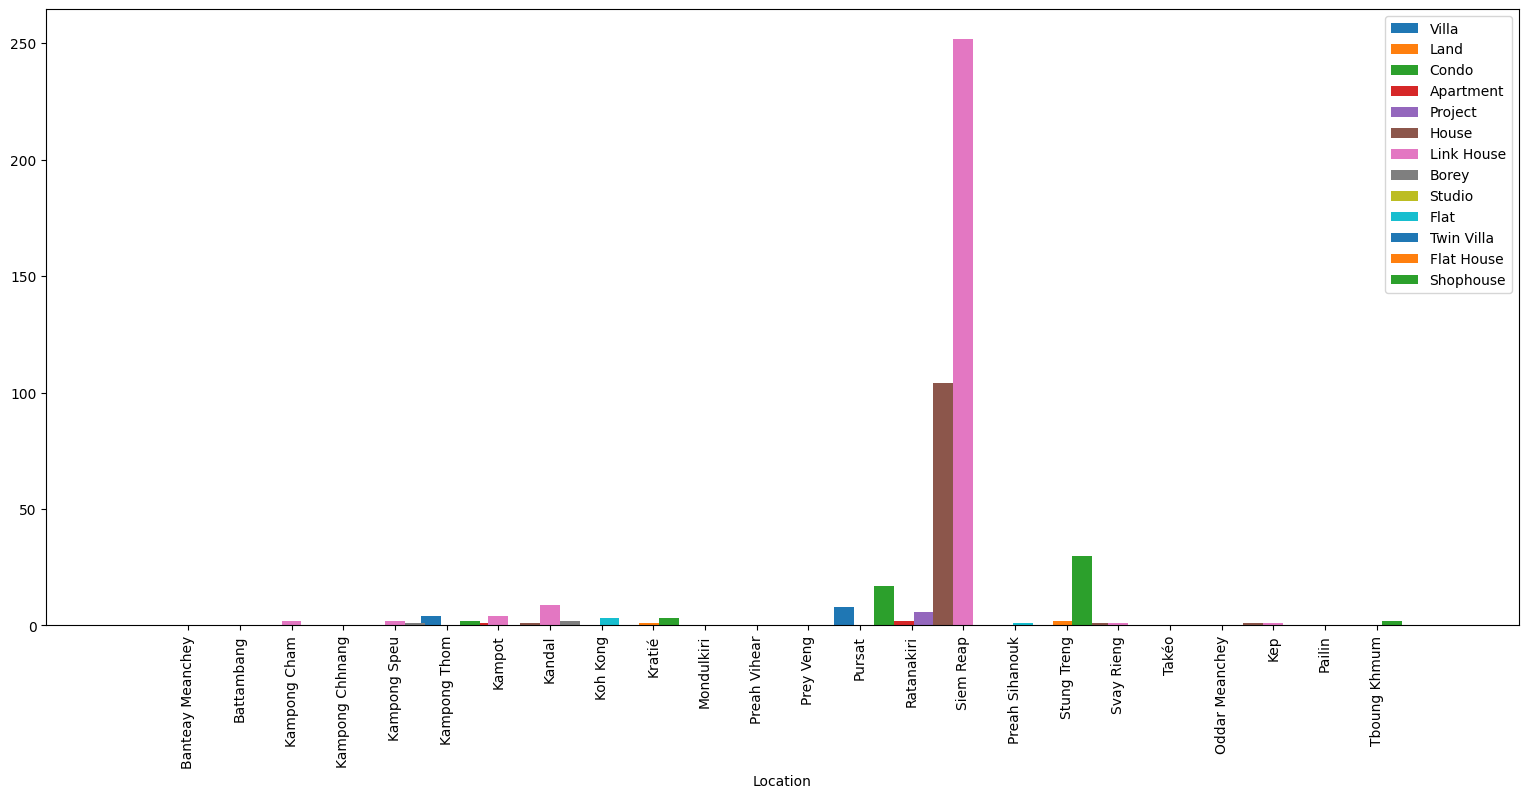

In [476]:
data=[["Banteay Meanchey", 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      ['Battambang', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      ['Kampong Cham', 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0],
      ['Kampong Chhnang', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      ['Kampong Speu', 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0],
      ['Kampong Thom', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      ['Kampot', 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0],
      ['Kandal', 4, 0, 2, 1, 0, 1, 9, 2, 0, 3, 0, 1, 3],
      ['Koh Kong', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      ['Kratié', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      ['Mondulkiri', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      ['Phnom Penh', 57, 4, 172, 11, 13, 26, 57, 13, 11, 17, 1, 38, 82],
      ['Preah Vihear', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      ['Prey Veng', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      ['Pursat', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      ['Ratanakiri', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      ['Siem Reap', 8, 0, 17, 2, 6, 104, 252, 0, 0, 1, 0, 2, 30],
      ['Preah Sihanouk', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      ['Stung Treng', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      ['Svay Rieng', 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
      ['Takéo', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      ['Oddar Meanchey', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      ['Kep', 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2],
      ['Pailin', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      ['Tboung Khmum', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
     ]
# Plot multiple columns bar chart

df=pd.DataFrame(data,columns=["Location",'Villa','Land','Condo','Apartment','Project','House','Link House','Borey','Studio','Flat','Twin Villa','Flat House','Shophouse'])

df.plot(x="Location", y=['Villa','Land','Condo','Apartment','Project','House','Link House','Borey','Studio','Flat','Twin Villa','Flat House','Shophouse'], kind="bar",figsize=(19,8), width=5,)

# Show

plt.show()